In [1]:
import numpy as np
import os
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import StandardScaler
from skimage import feature
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Define the path to the dataset
data_dir = r'C:\Users\vigne\OneDrive\Desktop\aiml_pro\EuroSAT\2750'

# Define the class names
class_names = ['Forest', 'Highway', 'Industrial', 'Pasture', 'Residential', 'River', 'SeaLake']

In [3]:
# Function to load images and labels from directories with feature extraction
def load_images_from_dir(data_dir, class_names, image_size=(64, 64)):
    images = []
    labels = []
    for class_index, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            try:
                image = Image.open(image_path).convert('RGB')
                image = image.resize(image_size)
                image = np.array(image) / 255.0
                images.append(image)
                labels.append(class_index)
            except Exception as e:
                print(f"Error loading image: {image_path}. Error: {e}")

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

In [4]:
# Load images and labels
satellite_images, land_cover_labels = load_images_from_dir(data_dir, class_names)

# Check the shape of loaded data
print(f"Loaded {len(satellite_images)} images with shape {satellite_images[0].shape}")

Loaded 18500 images with shape (64, 64, 3)


In [5]:
# Split the data into train and test datasets
train_images, test_images, train_labels, test_labels = train_test_split(
    satellite_images, land_cover_labels, test_size=0.2, random_state=42)

In [6]:
# CNN Model
cnn_model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(len(class_names), activation='softmax')
])

# Compile CNN Model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train CNN Model
cnn_history = cnn_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=1)

# Evaluate CNN Model
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_images, test_labels, verbose=2)
cnn_predictions = np.argmax(cnn_model.predict(test_images), axis=1)

print('\nCNN Test accuracy:', cnn_test_acc)
print('CNN Precision:', precision_score(test_labels, cnn_predictions, average='weighted'))
print('CNN Recall:', recall_score(test_labels, cnn_predictions, average='weighted'))
print('CNN F1 Score:', f1_score(test_labels, cnn_predictions, average='weighted'))
print('\nCNN Classification Report:\n', classification_report(test_labels, cnn_predictions, target_names=class_names))

Epoch 1/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 61s 118ms/step - accuracy: 0.4172 - loss: 1.3299 - val_accuracy: 0.6708 - val_loss: 0.8318
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 52s 113ms/step - accuracy: 0.7041 - loss: 0.7527 - val_accuracy: 0.7789 - val_loss: 0.5966
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 47s 102ms/step - accuracy: 0.8018 - loss: 0.5153 - val_accuracy: 0.8330 - val_loss: 0.4520
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 86s 112ms/step - accuracy: 0.8385 - loss: 0.4190 - val_accuracy: 0.8486 - val_loss: 0.3970
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 52s 111ms/step - accuracy: 0.8645 - loss: 0.3582 - val_accuracy: 0.8411 - val_loss: 0.4320
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 51s 110ms/step - accuracy: 0.8769 - loss: 0.3348 - val_accuracy: 0.8614 - val_loss: 0.3654
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 93s 134ms/step - accuracy: 0.8882 - loss: 0.2845 - val_accuracy: 0.8408 - val_loss: 0.4355
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 71s 110ms/step - accuracy: 0.8997 - loss: 0

In [7]:
import pandas as pd

# Compute confusion matrices
cnn_cm = confusion_matrix(test_labels, cnn_predictions)

# Print confusion matrices
print('CNN Confusion Matrix:')
print(cnn_cm)

CNN Confusion Matrix:
[[574   0   0   4   2   3   1]
 [  1 375   8  23  61  19   1]
 [  0  16 420   0  62   0   0]
 [ 43  18   0 341   0   5   7]
 [  0   0   0   0 625   0   0]
 [ 21 127   0  21  13 330   0]
 [ 85   0   0  11   0  13 470]]


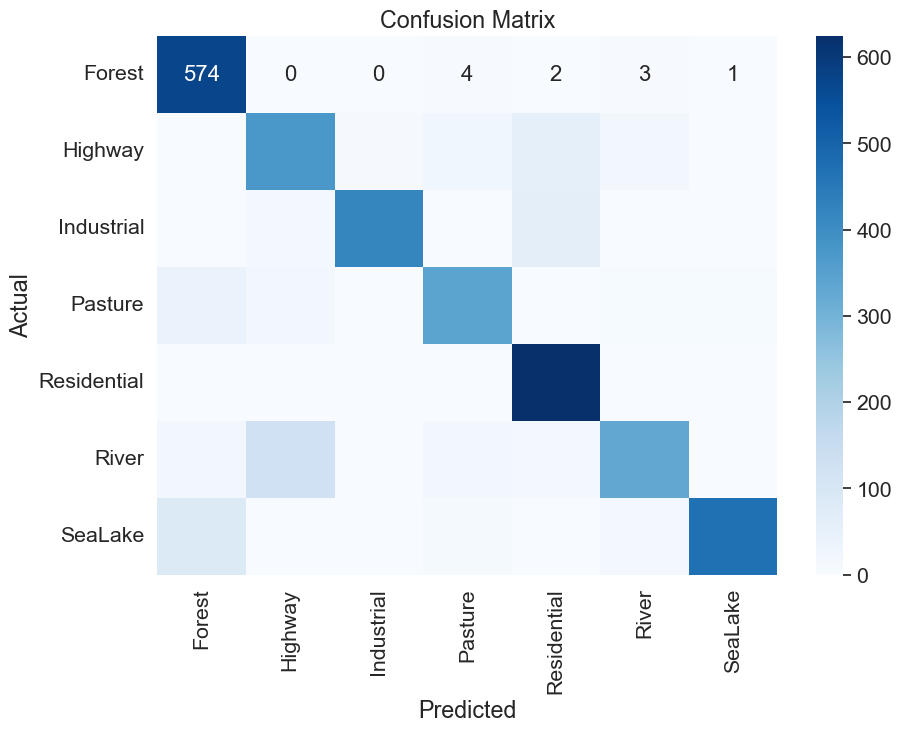

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Given confusion matrix
confusion_matrix_data = [
    [574, 0, 0, 4, 2, 3, 1],
    [1, 375, 8, 23, 61, 19, 1],
    [0, 16, 420, 0, 62, 0, 0],
    [43, 18, 0, 341, 0, 5, 7],
    [0, 0, 0, 0, 625, 0, 0],
    [21, 127, 0, 21, 13, 330, 0],
    [85, 0, 0, 11, 0, 13, 470]
]

# Define class names
class_names = ['Forest', 'Highway', 'Industrial', 'Pasture', 'Residential', 'River', 'SeaLake']

# Create DataFrame from the confusion matrix
df_cm = pd.DataFrame(confusion_matrix_data, index=class_names, columns=class_names)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='d')  # font size
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [9]:
# Function to calculate class-wise accuracy
def calculate_classwise_accuracy(true_labels, predictions):
    cm = confusion_matrix(true_labels, predictions)
    class_accuracy = cm.diagonal() / cm.sum(axis=1)
    return class_accuracy

# Calculate CNN class-wise accuracy
cnn_classwise_accuracy = calculate_classwise_accuracy(test_labels, cnn_predictions)

# Print CNN class-wise accuracy
for class_name, accuracy in zip(class_names, cnn_classwise_accuracy):
    print(f'{class_name}: {accuracy:.2f}')

Forest: 0.98
Highway: 0.77
Industrial: 0.84
Pasture: 0.82
Residential: 1.00
River: 0.64
SeaLake: 0.81


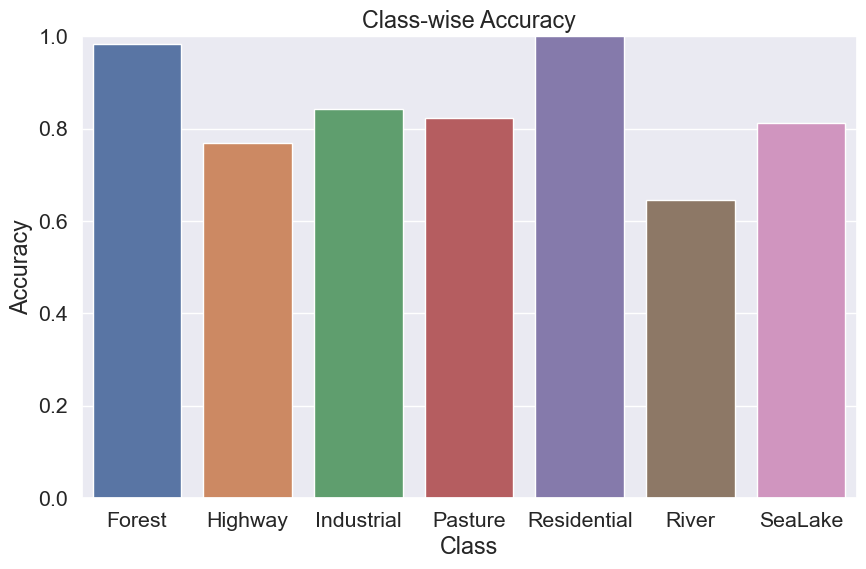

In [10]:
# Function to plot class-wise accuracy
def plot_classwise_accuracy(true_labels, predictions, class_names):
    cm = confusion_matrix(true_labels, predictions)
    class_accuracy = cm.diagonal() / cm.sum(axis=1)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=class_names, y=class_accuracy)
    plt.title('Class-wise Accuracy')
    plt.xlabel('Class')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.show()

# Plot CNN class-wise accuracy
plot_classwise_accuracy(test_labels, cnn_predictions, class_names)

In [11]:
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras

# Define the class names used in your model
class_names = ['Forest', 'Highway', 'Industrial', 'Pasture', 'Residential', 'River', 'SeaLake']

# Function to preprocess a single image
def preprocess_image(image_path, image_size=(64, 64)):
    try:
        image = Image.open(image_path).convert('RGB')
        image = image.resize(image_size)
        image = np.array(image) / 255.0
        return image
    except Exception as e:
        print(f"Error loading image: {image_path}. Error: {e}")
        return None

# Function to classify multiple images using the trained model
def classify_images(model, image_paths, class_names):
    predicted_classes = []
    for image_path in image_paths:
        image = preprocess_image(image_path)
        if image is None:
            predicted_classes.append(None)
            continue
        
        # Reshape and expand dimensions to match model input shape
        image = np.expand_dims(image, axis=0)
        
        # Predict class probabilities
        predictions = model.predict(image)
        
        # Get predicted class index
        predicted_class_index = np.argmax(predictions)
        
        # Map index to class name
        predicted_class_name = class_names[predicted_class_index]
        
        # Append to predicted_classes list
        predicted_classes.append(predicted_class_name)
    
    return predicted_classes

# Example usage:
image_paths_to_classify = [
    r'C:\Users\vigne\OneDrive\Desktop\aiml_pro\F1.jpg',
    r'C:\Users\vigne\OneDrive\Desktop\aiml_pro\Ind1.jpg',
    r'C:\Users\vigne\OneDrive\Desktop\aiml_pro\Res1.jpg',
    r'C:\Users\vigne\OneDrive\Desktop\aiml_pro\River1.jpg',
    r'C:\Users\vigne\OneDrive\Desktop\aiml_pro\Highway1.jpg',
    r'C:\Users\vigne\OneDrive\Desktop\aiml_pro\Highway2.jpg',
    r'C:\Users\vigne\OneDrive\Desktop\aiml_pro\Pasture1.jpg',
    r'C:\Users\vigne\OneDrive\Desktop\aiml_pro\Res2.jpg',
    r'C:\Users\vigne\OneDrive\Desktop\aiml_pro\River2.jpg',
    r'C:\Users\vigne\OneDrive\Desktop\aiml_pro\F2.jpg',
    r'C:\Users\vigne\OneDrive\Desktop\aiml_pro\SeaLake.jpg'
]  # Replace with your image paths

predicted_classes = classify_images(cnn_model, image_paths_to_classify, class_names)

# Print predicted classes for each image
for image_path, predicted_class in zip(image_paths_to_classify, predicted_classes):
    if predicted_class:
        print(f"Image '{image_path}' is classified as '{predicted_class}'.")
    else:
        print(f"Failed to classify image '{image_path}'. Please check the image path.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image 'C:\Users\vigne\OneDrive\Desktop\aiml_pro\F1.jpg' is classified as 'Forest'.
Image 'C:\Users\vigne\OneDrive\Desktop\aiml_pro\Ind1.jpg' is classified as 'Industrial'.
Image 'C:\Users\vigne\OneDrive\Desktop\aiml_pro\Res1.jpg' is classified as 'Residential'.
Image 'C:\Users\vigne\OneDrive\Desktop\aiml_pro\River1.jpg' is classified as 'Highway'.
Image 'C:\Users\vigne\OneDrive\Desktop\aiml_pro\Highway1.jpg' is classified as 'Highway'.
Image 'C:\Users\vigne\OneDrive\Desktop\aiml_pro\Highway2.jpg' is classified as 'Highway'.
Image 'C:\Users\vigne\OneDrive\Desktop\aiml_pro\Pas

In [12]:
# Save CNN model
cnn_model.save('cnn_model.h5')

In [13]:
# Prepare data for traditional machine learning models
train_images_flattened = train_images.reshape(train_images.shape[0], -1)
test_images_flattened = test_images.reshape(test_images.shape[0], -1)

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(train_images_flattened, train_labels)
rf_predictions = rf_clf.predict(test_images_flattened)

print('\nRandom Forest Test accuracy:', accuracy_score(test_labels, rf_predictions))
print('Random Forest Precision:', precision_score(test_labels, rf_predictions, average='weighted'))
print('Random Forest Recall:', recall_score(test_labels, rf_predictions, average='weighted'))
print('Random Forest F1 Score:', f1_score(test_labels, rf_predictions, average='weighted'))
print('\nRandom Forest Classification Report:\n', classification_report(test_labels, rf_predictions, target_names=class_names))


Random Forest Test accuracy: 0.7672972972972973
Random Forest Precision: 0.7643002248035545
Random Forest Recall: 0.7672972972972973
Random Forest F1 Score: 0.7605825995619377

Random Forest Classification Report:
               precision    recall  f1-score   support

      Forest       0.84      0.93      0.88       584
     Highway       0.61      0.40      0.48       488
  Industrial       0.76      0.88      0.81       498
     Pasture       0.79      0.81      0.80       414
 Residential       0.65      0.77      0.71       625
       River       0.73      0.66      0.69       512
     SeaLake       0.96      0.88      0.92       579

    accuracy                           0.77      3700
   macro avg       0.76      0.76      0.76      3700
weighted avg       0.76      0.77      0.76      3700



In [15]:
rf_cm = confusion_matrix(test_labels, rf_predictions)
print('\nRandom Forest Confusion Matrix:')
print(rf_cm)


Random Forest Confusion Matrix:
[[545   0   0  20   2   4  13]
 [ 15 194  40  24 136  78   1]
 [  0  18 436   0  41   3   0]
 [ 16   9   3 335  30  17   4]
 [  0  43  76   7 481  18   0]
 [ 35  53  18  23  42 337   4]
 [ 37   1   2  15   6   7 511]]


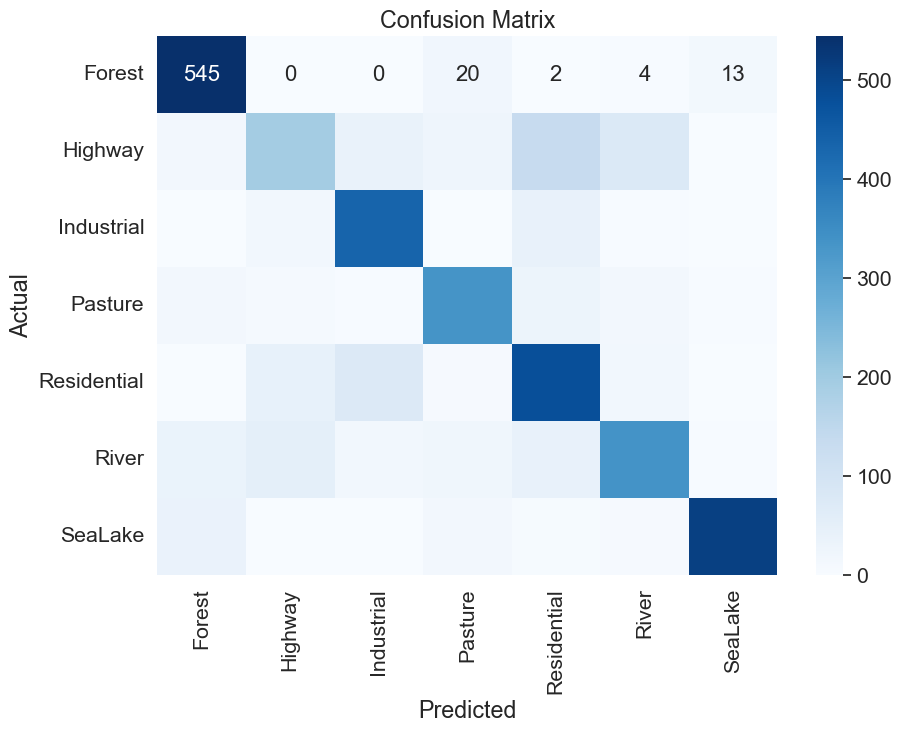

In [17]:
confusion_matrix_data = [
    [545, 0, 0, 20, 2, 4, 13],
    [15, 194, 40, 24, 136, 78, 1],
    [0, 18, 436, 0, 41, 3, 0],
    [16, 9, 3, 335, 30, 17, 4],
    [0, 43, 76, 7, 481, 18, 0],
    [35, 53, 18, 23, 42, 337, 4],
    [37, 1, 2, 15, 6, 7, 511]    
]

# Define class names
class_names = ['Forest', 'Highway', 'Industrial', 'Pasture', 'Residential', 'River', 'SeaLake']

# Create DataFrame from the confusion matrix
df_cm = pd.DataFrame(confusion_matrix_data, index=class_names, columns=class_names)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap='Blues',fmt='d')  # font size
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Forest: 0.93
Highway: 0.40
Industrial: 0.88
Pasture: 0.81
Residential: 0.77
River: 0.66
SeaLake: 0.88


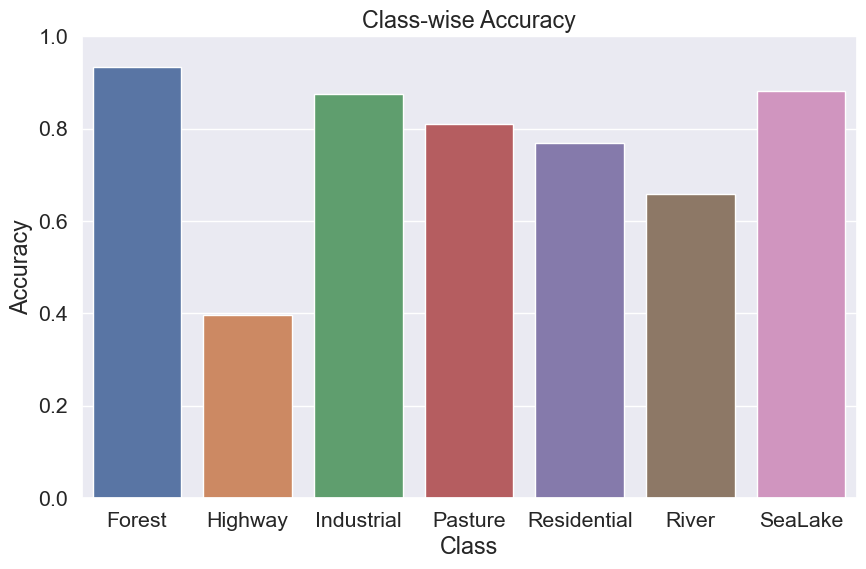

In [18]:
# Calculate Random Forest class-wise accuracy
rf_classwise_accuracy = calculate_classwise_accuracy(test_labels, rf_predictions)

# Print Random Forest class-wise accuracy
for class_name, accuracy in zip(class_names, rf_classwise_accuracy):
    print(f'{class_name}: {accuracy:.2f}')

# Plot Random Forest class-wise accuracy
plot_classwise_accuracy(test_labels, rf_predictions, class_names)

In [19]:
# PCA for SVM Model
pca = PCA(n_components=100)
pca.fit(train_images_flattened)
train_features_pca = pca.transform(train_images_flattened)
test_features_pca = pca.transform(test_images_flattened)

# SVM Model with PCA
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(train_features_pca, train_labels)
svm_predictions = svm_model.predict(test_features_pca)

print('\nSVM Accuracy:', accuracy_score(test_labels, svm_predictions))
print('SVM Precision:', precision_score(test_labels, svm_predictions, average='weighted'))
print('SVM Recall:', recall_score(test_labels, svm_predictions, average='weighted'))
print('SVM F1 Score:', f1_score(test_labels, svm_predictions, average='weighted'))
print('\nSVM Classification Report:\n', classification_report(test_labels, svm_predictions, target_names=class_names))


SVM Accuracy: 0.5789189189189189
SVM Precision: 0.5758016195215228
SVM Recall: 0.5789189189189189
SVM F1 Score: 0.5729396488370635

SVM Classification Report:
               precision    recall  f1-score   support

      Forest       0.69      0.68      0.68       584
     Highway       0.40      0.36      0.38       488
  Industrial       0.78      0.81      0.79       498
     Pasture       0.49      0.50      0.50       414
 Residential       0.56      0.68      0.61       625
       River       0.54      0.35      0.42       512
     SeaLake       0.54      0.62      0.58       579

    accuracy                           0.58      3700
   macro avg       0.57      0.57      0.57      3700
weighted avg       0.58      0.58      0.57      3700



In [20]:
svm_cm = confusion_matrix(test_labels, svm_predictions)
print('\nSVM Confusion Matrix:')
print(svm_cm)


SVM Confusion Matrix:
[[396   4   0  26   8   2 148]
 [ 14 178  26  38 164  53  15]
 [  0  14 401   0  74   9   0]
 [ 36  52   6 206   6  49  59]
 [  1 119  51   1 426  25   2]
 [ 47  64  22  65  59 177  78]
 [ 81  12   6  81  26  15 358]]


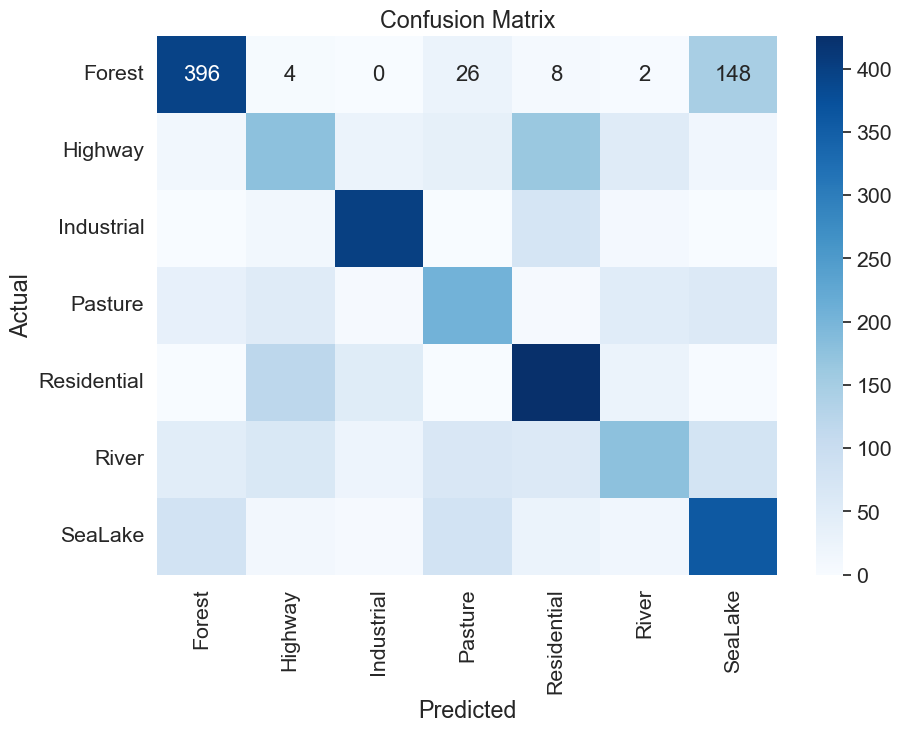

In [21]:
confusion_matrix_data = [
    [396, 4, 0, 26, 8, 2, 148],
    [14, 178, 26, 38, 164, 53, 15],
    [0, 14, 401, 0, 74, 9, 0],
    [36, 52, 6, 206, 6, 49, 59],
    [1, 119, 51, 1, 426, 25, 2],
    [47, 64, 22, 65, 59, 177, 78],
    [81, 12, 6, 81, 26, 15, 358]   
]

# Define class names
class_names = ['Forest', 'Highway', 'Industrial', 'Pasture', 'Residential', 'River', 'SeaLake']

# Create DataFrame from the confusion matrix
df_cm = pd.DataFrame(confusion_matrix_data, index=class_names, columns=class_names)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap='Blues',fmt='d')  # font size
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Forest: 0.68
Highway: 0.36
Industrial: 0.81
Pasture: 0.50
Residential: 0.68
River: 0.35
SeaLake: 0.62


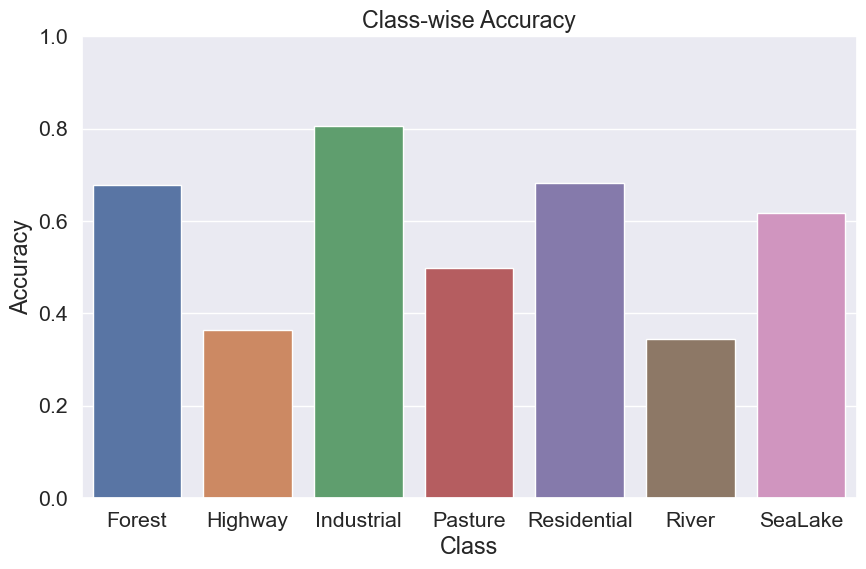

In [22]:
# Calculate SVM class-wise accuracy
svm_classwise_accuracy = calculate_classwise_accuracy(test_labels, svm_predictions)

# Print SVM class-wise accuracy
for class_name, accuracy in zip(class_names, svm_classwise_accuracy):
    print(f'{class_name}: {accuracy:.2f}')

# Plot SVM class-wise accuracy
plot_classwise_accuracy(test_labels, svm_predictions, class_names)

In [24]:
import xgboost as xgb

# XGBoost Classifier
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=len(class_names), random_state=42)
xgb_clf.fit(train_features_pca, train_labels)
xgb_predictions = xgb_clf.predict(test_features_pca)

# Evaluate XGBoost Classifier
print('\nXGBoost Accuracy:', accuracy_score(test_labels, xgb_predictions))
print('XGBoost Precision:', precision_score(test_labels, xgb_predictions, average='weighted'))
print('XGBoost Recall:', recall_score(test_labels, xgb_predictions, average='weighted'))
print('XGBoost F1 Score:', f1_score(test_labels, xgb_predictions, average='weighted'))
print('\nXGBoost Classification Report:\n', classification_report(test_labels, xgb_predictions, target_names=class_names))


XGBoost Accuracy: 0.8043243243243243
XGBoost Precision: 0.8042791428508195
XGBoost Recall: 0.8043243243243243
XGBoost F1 Score: 0.8031862666500096

XGBoost Classification Report:
               precision    recall  f1-score   support

      Forest       0.90      0.94      0.92       584
     Highway       0.57      0.52      0.55       488
  Industrial       0.90      0.90      0.90       498
     Pasture       0.82      0.78      0.80       414
 Residential       0.77      0.88      0.82       625
       River       0.67      0.66      0.67       512
     SeaLake       0.97      0.89      0.93       579

    accuracy                           0.80      3700
   macro avg       0.80      0.80      0.80      3700
weighted avg       0.80      0.80      0.80      3700



In [25]:
xgb_cm = confusion_matrix(test_labels, xgb_predictions)
print('\nXGBoost Confusion Matrix:')
print(xgb_cm)


XGBoost Confusion Matrix:
[[547   1   0  18   0  10   8]
 [  0 256  27  19  90  94   2]
 [  0  13 449   0  32   4   0]
 [ 23  22   0 323  20  23   3]
 [  0  53   9   1 547  15   0]
 [ 13 100  13  22  22 339   3]
 [ 23   5   1  10   3  22 515]]


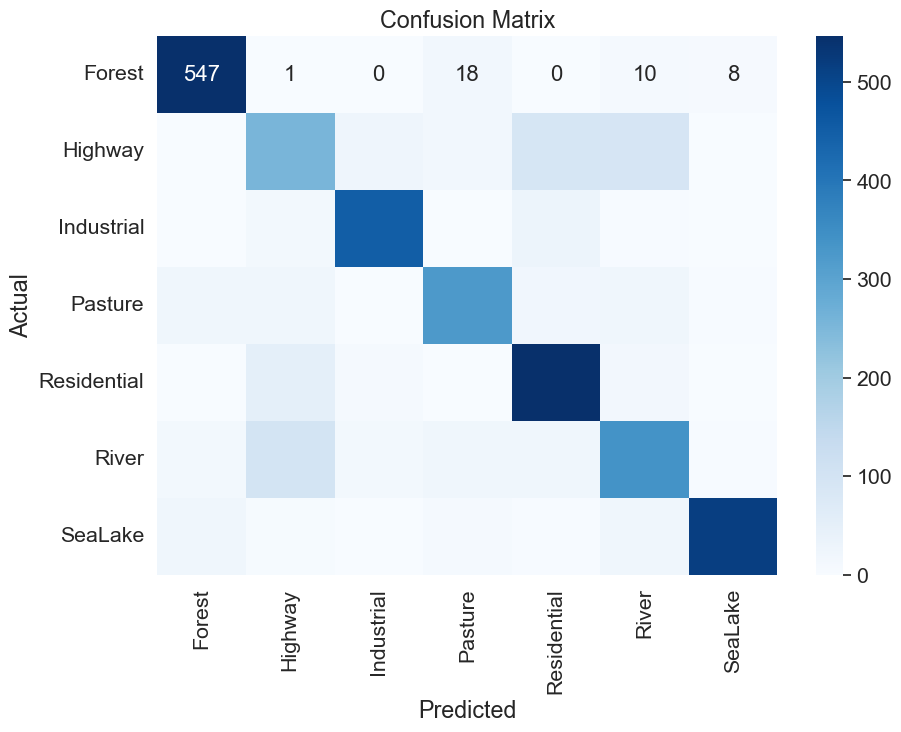

In [26]:
confusion_matrix_data = [
    [547,   1,   0,  18,   0,  10,   8],
    [  0, 256,  27,  19,  90,  94,   2],
    [  0,  13, 449,   0,  32,   4,   0],
    [ 23,  22,   0, 323,  20,  23,   3],
    [  0,  53,   9,   1, 547,  15,   0],
    [ 13, 100,  13,  22,  22, 339,   3],
    [ 23,   5,   1,  10,   3,  22, 515]  
]

# Define class names
class_names = ['Forest', 'Highway', 'Industrial', 'Pasture', 'Residential', 'River', 'SeaLake']

# Create DataFrame from the confusion matrix
df_cm = pd.DataFrame(confusion_matrix_data, index=class_names, columns=class_names)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap='Blues',fmt='d')  # font size
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Forest: 0.94
Highway: 0.52
Industrial: 0.90
Pasture: 0.78
Residential: 0.88
River: 0.66
SeaLake: 0.89


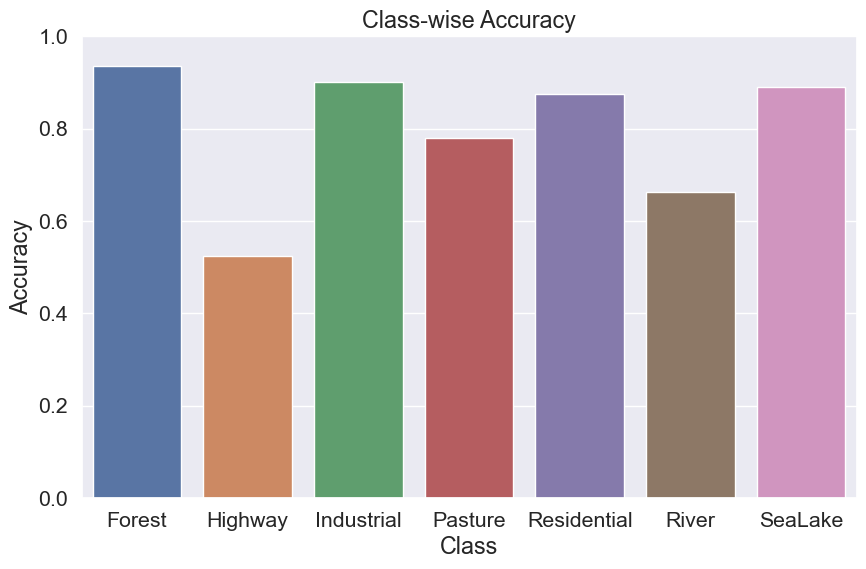

In [27]:
# Calculate XGBoost class-wise accuracy
xgb_classwise_accuracy = calculate_classwise_accuracy(test_labels, xgb_predictions)

# Print XGBoost class-wise accuracy
for class_name, accuracy in zip(class_names, xgb_classwise_accuracy):
    print(f'{class_name}: {accuracy:.2f}')

# Plot XGBoost class-wise accuracy
plot_classwise_accuracy(test_labels, xgb_predictions, class_names)

In [28]:
# Function to classify multiple images using all models
def classify_images(image_paths):
    predictions = []
    for image_path in image_paths:
        image = preprocess_image(image_path)
        image_flattened = image.reshape(1, -1)
        
        # CNN Prediction
        cnn_prediction = np.argmax(cnn_model.predict(image.reshape(1, 64, 64, 3)), axis=1)[0]
        
        # Random Forest Prediction
        rf_prediction = rf_clf.predict(image_flattened)[0]
        
        # SVM Prediction
        image_pca = pca.transform(image_flattened)
        svm_prediction = svm_model.predict(image_pca)[0]
        
        # XGBoost Prediction
        xgb_prediction = xgb_clf.predict(image_pca)[0]
        
        predictions.append({
            'image_path': image_path,
            'cnn': class_names[cnn_prediction],
            'rf': class_names[rf_prediction],
            'svm': class_names[svm_prediction],
            'xgb': class_names[xgb_prediction]
        })
    
    return predictions

# Example usage of classify_images function with a list of image paths
image_paths = [
    r'C:\Users\vigne\OneDrive\Desktop\aiml_pro\F1.jpg',
    r'C:\Users\vigne\OneDrive\Desktop\aiml_pro\Ind1.jpg',
    r'C:\Users\vigne\OneDrive\Desktop\aiml_pro\Res1.jpg',
    r'C:\Users\vigne\OneDrive\Desktop\aiml_pro\River1.jpg',
    r'C:\Users\vigne\OneDrive\Desktop\aiml_pro\Highway1.jpg',
    r'C:\Users\vigne\OneDrive\Desktop\aiml_pro\Highway2.jpg',
    r'C:\Users\vigne\OneDrive\Desktop\aiml_pro\Pasture1.jpg',
    r'C:\Users\vigne\OneDrive\Desktop\aiml_pro\Res2.jpg',
    r'C:\Users\vigne\OneDrive\Desktop\aiml_pro\River2.jpg',
    r'C:\Users\vigne\OneDrive\Desktop\aiml_pro\F2.jpg',
    r'C:\Users\vigne\OneDrive\Desktop\aiml_pro\SeaLake.jpg'
]
predictions = classify_images(image_paths)
for prediction in predictions:
    print(f"Image: {prediction['image_path']}")
    print(f"CNN Prediction: {prediction['cnn']}")
    print(f"Random Forest Prediction: {prediction['rf']}")
    print(f"SVM Prediction: {prediction['svm']}")
    print(f"XGBoost Prediction: {prediction['xgb']}")
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Image: C:\Users\vigne\OneDrive\Desktop\aiml_pro\F1.jpg
CNN Prediction: Forest
Random Forest Prediction: Forest
SVM Prediction: SeaLake
XGBoost Prediction: Forest

Image: C:\Users\vigne\OneDrive\Desktop\aiml_pro\Ind1.jpg
CNN Prediction: Industrial
Random Forest Prediction: Industrial
SVM Prediction: Residential
XGBoost Prediction: Industrial

Image: C:\Users\vigne\OneDrive\Desktop\aiml_pro\Res1.jpg
CNN Prediction: Residential
Random Forest Prediction: Residential
SVM Prediction: Residential
XGBoost Prediction: Residential

Image: C:\Users\vigne\OneDrive\Desktop\aiml_pro\River